In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the required packages
import time
import psutil
import numpy as np
import pandas as pd
import multiprocessing as mp

# Check the number of cores and memory usage
num_cores = mp.cpu_count()
print("This kernel has ",num_cores,"cores and you can find the information regarding the memory usage:",psutil.virtual_memory())

This kernel has  8 cores and you can find the information regarding the memory usage: svmem(total=7469842432, available=2182705152, percent=70.8, used=5287137280, free=2182705152)


In [3]:
import multiprocessing

def worker():
    #worker function
    print ('Worker')
    x = 0
    while x < 1000:
        print(x)
        x += 1
    return

if __name__ == '__main__':
    jobs = []
    for i in range(50):
        p = multiprocessing.Process(target=worker)
        jobs.append(p)
        p.start()

In [4]:
df=pd.read_csv('US_Accidents_Dec19.csv')

In [5]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [6]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [7]:
df['Sunrise_Sunset'].value_counts()

Day      2194084
Night     780158
Name: Sunrise_Sunset, dtype: int64

In [8]:
df['Start_Time']=df['Start_Time'].astype(str)

In [9]:
df['Month'] = df.Start_Time.map(lambda x: int(x.split('-')[1]))
df['Year']=df.Start_Time.map(lambda x:  int(x.split('-')[0]))
df['time']=df.Start_Time.map(lambda x: x.split(' ')[1])
df['date']=df.Start_Time.map(lambda x: x.split('-')[2])
df['date']=df.Start_Time.map(lambda x: x.split(' ')[0])

In [10]:
#With the help of start time we are able to get the month, time, year, and date

In [11]:
df19=df[df['Year'] == 2019]

In [12]:
#since the data is huge, am taking only the year 2019

In [13]:
df19['Month'].value_counts().sort_values(ascending=False)

10    106802
12     98210
9      87666
11     81893
1      79275
8      75236
2      74556
5      73868
4      73000
3      69396
7      68232
6      65496
Name: Month, dtype: int64

In [14]:
def missing_check(df1):
    total = df1.isnull().sum().sort_values(ascending=False)
    percent = (df1.isnull().sum()/df1.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) 
    return missing_data
missing_check(df19)

,Total,Percent
End_Lat,691922,0.725567
End_Lng,691922,0.725567
Number,598900,0.628021
TMC,261708,0.274433
Precipitation(in),219122,0.229777
Wind_Chill(F),149234,0.156490
Wind_Speed(mph),60083,0.063005
Wind_Direction,19974,0.020945
Visibility(mi),18481,0.019380
Weather_Condition,18283,0.019172


In [15]:
df19['time']=df19.time.map(lambda x: x.split(':')[0])

C:\Users\Arun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
df19['time']=df19['time'].astype(int)

C:\Users\Arun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
def v2f (s):
    if s >=6 and s <10:
        return ('morning')
    elif s >=10 and s <16:
        return ('noon')
    elif s >=16 and s <20:
        return ('evening')
    else:
        return ('night')

In [18]:
df19["daytime"]=df19["time"].apply (lambda x: v2f(x))

C:\Users\Arun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
# by splitting the day into 4 different parts we will be able to classify them better, will be usefull for EDA and imputting missing value

In [20]:
df19['daytime'].value_counts()

morning    310758
noon       278257
evening    225400
night      139215
Name: daytime, dtype: int64

In [21]:
df19.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Month', 'Year', 'time', 'date', 'daytime'],
      dtype='object')

In [22]:
df19t=df19.copy()

In [23]:
df19.drop(columns=['ID','Source','TMC','End_Lat','End_Lng','Number','Street','Zipcode','Airport_Code','Description', 'Civil_Twilight','Timezone', 'Weather_Timestamp','Nautical_Twilight',
       'Astronomical_Twilight'],axis=1,inplace=True)

C:\Users\Arun\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [24]:
df19.columns

Index(['Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Distance(mi)', 'Side', 'City', 'County', 'State', 'Country',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Month', 'Year', 'time', 'date', 'daytime'],
      dtype='object')

In [25]:
missing_check(df19)

,Total,Percent
Precipitation(in),219122,0.229777
Wind_Chill(F),149234,0.156490
Wind_Speed(mph),60083,0.063005
Wind_Direction,19974,0.020945
Visibility(mi),18481,0.019380
Weather_Condition,18283,0.019172
Humidity(%),18266,0.019154
Temperature(F),17184,0.018020
Pressure(in),13795,0.014466
Sunrise_Sunset,22,0.000023


In [26]:
def v2f (s):
    if s <4:
        return (1)
    elif s >=4 and s <7:
        return (2)
    elif s >=7 and s <9:
        return (3)
    else:
        return (4)

In [27]:
df19["quaters"]=df19["Month"].apply (lambda x: v2f(x))

C:\Users\Arun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
df19["quaters"].value_counts()

4    374571
1    223227
2    212364
3    143468
Name: quaters, dtype: int64

Missing value imputation.

In [29]:
df19["City"] = df19["City"].groupby(df19.County).transform(lambda x: x.replace(np.nan,x.mode()[0]))

C:\Users\Arun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
df19["Weather_Condition"] = df19["Weather_Condition"].groupby(by=[df19.State,df19.Month]).apply(lambda x: x.replace(np.nan,x.mode()[0]))

C:\Users\Arun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
df19["Weather_Condition"].isnull().sum()

0

In [32]:
df19["Wind_Direction"] = df19["Wind_Direction"].groupby(by=[df19.State,df19.Month]).apply(lambda x: x.replace(np.nan,x.mode()[0]))

C:\Users\Arun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
df19['Precipitation(in)']=df19['Precipitation(in)'].groupby(by=[df19.Weather_Condition]).apply(lambda x: x.fillna(x.mean()))
df19['Precipitation(in)']=df19['Precipitation(in)'].groupby(by=[df19.City,df19.Month,df19.daytime]).apply(lambda x: x.fillna(x.mean()))


df19['Precipitation(in)']=df19['Precipitation(in)'].groupby(by=[df19.City,df19.Month,df19.Sunrise_Sunset]).apply(lambda x: x.fillna(x.mean()))
df19['Precipitation(in)']=df19['Precipitation(in)'].groupby(by=[df19.County,df19.Month,df19.daytime]).apply(lambda x: x.fillna(x.mean()))

df19['Precipitation(in)']=df19['Precipitation(in)'].groupby(by=[df19.County,df19.Month,df19.Sunrise_Sunset]).apply(lambda x: x.fillna(x.mean()))


C:\Users\Arun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Arun\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Arun\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

In [34]:
df19['Wind_Chill(F)']=df19['Wind_Chill(F)'].groupby(by=[df19.Weather_Condition]).apply(lambda x: x.fillna(x.mean()))

C:\Users\Arun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
df19['Wind_Chill(F)']=df19['Wind_Chill(F)'].groupby(by=[df19.City,df19.Month,df19.daytime]).apply(lambda x: x.fillna(x.mean()))

df19['Wind_Chill(F)']=df19['Wind_Chill(F)'].groupby(by=[df19.City,df19.Month,df19.Sunrise_Sunset]).apply(lambda x: x.fillna(x.mean()))
df19['Wind_Chill(F)']=df19['Wind_Chill(F)'].groupby(by=[df19.County,df19.Month,df19.daytime]).apply(lambda x: x.fillna(x.mean()))

df19['Wind_Chill(F)']=df19['Wind_Chill(F)'].groupby(by=[df19.County,df19.Month,df19.Sunrise_Sunset]).apply(lambda x: x.fillna(x.mean()))


C:\Users\Arun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Arun\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Arun\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [36]:
df19['Wind_Speed(mph)']=df19['Wind_Speed(mph)'].groupby(by=[df19.City,df19.Month,df19.daytime]).apply(lambda x: x.fillna(x.mean()))

df19['Wind_Speed(mph)']=df19['Wind_Speed(mph)'].groupby(by=[df19.City,df19.Month,df19.Sunrise_Sunset]).apply(lambda x: x.fillna(x.mean()))
df19['Wind_Speed(mph)']=df19['Wind_Speed(mph)'].groupby(by=[df19.County,df19.Month,df19.daytime]).apply(lambda x: x.fillna(x.mean()))

df19['Wind_Speed(mph)']=df19['Wind_Speed(mph)'].groupby(by=[df19.County,df19.Month,df19.Sunrise_Sunset]).apply(lambda x: x.fillna(x.mean()))


C:\Users\Arun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Arun\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Arun\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [37]:
df19['Visibility(mi)']=df19['Visibility(mi)'].groupby(by=[df19.City,df19.Month,df19.daytime]).apply(lambda x: x.fillna(x.mean()))

df19['Visibility(mi)']=df19['Visibility(mi)'].groupby(by=[df19.City,df19.Month,df19.Sunrise_Sunset]).apply(lambda x: x.fillna(x.mean()))
df19['Visibility(mi)']=df19['Visibility(mi)'].groupby(by=[df19.County,df19.Month,df19.daytime]).apply(lambda x: x.fillna(x.mean()))

df19['Visibility(mi)']=df19['Visibility(mi)'].groupby(by=[df19.County,df19.Month,df19.Sunrise_Sunset]).apply(lambda x: x.fillna(x.mean()))


C:\Users\Arun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Arun\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Arun\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [38]:
df19['Humidity(%)']=df19['Humidity(%)'].groupby(by=[df19.City,df19.Month,df19.daytime]).apply(lambda x: x.fillna(x.mean()))
df19['Humidity(%)']=df19['Humidity(%)'].groupby(by=[df19.City,df19.Month,df19.Sunrise_Sunset]).apply(lambda x: x.fillna(x.mean()))



df19['Humidity(%)']=df19['Humidity(%)'].groupby(by=[df19.County,df19.Month,df19.daytime]).apply(lambda x: x.fillna(x.mean()))
df19['Humidity(%)']=df19['Humidity(%)'].groupby(by=[df19.County,df19.Month,df19.Sunrise_Sunset]).apply(lambda x: x.fillna(x.mean()))


C:\Users\Arun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Arun\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Arun\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

In [39]:
df19['Temperature(F)']=df19['Temperature(F)'].groupby(by=[df19.Weather_Condition]).apply(lambda x: x.fillna(x.mean()))

C:\Users\Arun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
df19['Pressure(in)']=df19['Pressure(in)'].groupby(by=[df19['Temperature(F)']]).apply(lambda x: x.fillna(x.mean()))

C:\Users\Arun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [41]:
missing_check(df19)

,Total,Percent
Wind_Speed(mph),594,0.000623
Visibility(mi),400,0.000419
Humidity(%),360,0.000378
Precipitation(in),23,0.000024
Sunrise_Sunset,22,0.000023
Wind_Chill(F),22,0.000023
Pressure(in),1,0.000001
State,0,0.000000
Wind_Direction,0,0.000000
Temperature(F),0,0.000000


In [42]:
dft=df19.dropna()

In [43]:
missing_check(dft)

,Total,Percent
quaters,0,0.0
daytime,0,0.0
Wind_Speed(mph),0,0.0
Wind_Direction,0,0.0
Visibility(mi),0,0.0
Pressure(in),0,0.0
Humidity(%),0,0.0
Wind_Chill(F),0,0.0
Temperature(F),0,0.0
Country,0,0.0


In [44]:
for i in dft.columns:
    if dft[i].dtypes=='float64':
        dft[i]=dft[i].astype('float32')
    elif dft[i].dtypes=='int64':
        dft[i]=dft[i].astype('int32')

C:\Users\Arun\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Arun\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [45]:
#changing to int32 and float32 will reduce the size of data frame

In [46]:
dft.dtypes

Severity               int32
Start_Time            object
End_Time              object
Start_Lat            float32
Start_Lng            float32
Distance(mi)         float32
Side                  object
City                  object
County                object
State                 object
Country               object
Temperature(F)       float32
Wind_Chill(F)        float32
Humidity(%)          float32
Pressure(in)         float32
Visibility(mi)       float32
Wind_Direction        object
Wind_Speed(mph)      float32
Precipitation(in)    float32
Weather_Condition     object
Amenity                 bool
Bump                    bool
Crossing                bool
Give_Way                bool
Junction                bool
No_Exit                 bool
Railway                 bool
Roundabout              bool
Station                 bool
Stop                    bool
Traffic_Calming         bool
Traffic_Signal          bool
Turning_Loop            bool
Sunrise_Sunset        object
Month         

In [47]:
dft.drop(columns=['Start_Time', 'End_Time','Year',],axis=1,inplace=True)

C:\Users\Arun\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [48]:
df1=dft.drop(columns=['time', 'date','daytime','quaters','Start_Lat', 'Start_Lng','Country'],axis=1)

In [49]:
df1['Month']=df1['Month'].astype(object)

In [50]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

dfcol=df1.select_dtypes(include=numerics).columns

Removing extreme outliers

In [51]:
df1=df1[df1['Wind_Chill(F)']>-25]

In [52]:
df1=df1[df1['Temperature(F)']>-5]

In [53]:
df1=df1[df1['Temperature(F)']<110]

In [54]:
df1=df1[df1['Temperature(F)']>-20]

In [55]:
df1=df1[df1['Pressure(in)']>20]

In [56]:
df1=df1[df1['Visibility(mi)']<60]

In [57]:
df1=df1[df1['Wind_Speed(mph)']<100]

In [58]:
df1=df1[df1['Precipitation(in)']<10]

In [59]:
df1=df1[df1['Distance(mi)']<50]

In [60]:
pd.DataFrame(df1).to_csv("test.csv",index=False)

In [61]:
#df=df1

In [62]:
%time df=pd.read_csv('test.csv')

Wall time: 5.14 s


In [63]:
df1=df.copy()

In [64]:
df.columns

Index(['Severity', 'Distance(mi)', 'Side', 'City', 'County', 'State',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Month'],
      dtype='object')

In [65]:
df.dtypes

Severity               int64
Distance(mi)         float64
Side                  object
City                  object
County                object
State                 object
Temperature(F)       float64
Wind_Chill(F)        float64
Humidity(%)          float64
Pressure(in)         float64
Visibility(mi)       float64
Wind_Direction        object
Wind_Speed(mph)      float64
Precipitation(in)    float64
Weather_Condition     object
Amenity                 bool
Bump                    bool
Crossing                bool
Give_Way                bool
Junction                bool
No_Exit                 bool
Railway                 bool
Roundabout              bool
Station                 bool
Stop                    bool
Traffic_Calming         bool
Traffic_Signal          bool
Turning_Loop            bool
Sunrise_Sunset        object
Month                  int64
dtype: object

In [66]:
df['Month']=df['Month'].astype(object)

In [67]:
boolcols=df.select_dtypes(['bool'])

In [68]:
lecols=pd.concat([boolcols,df['Side'],df['Sunrise_Sunset'],df['Severity']],axis=1)


In [69]:
df=df.drop(['Side','Sunrise_Sunset'],axis=1)

In [70]:
cat_cols=df.select_dtypes(['object'])


In [71]:
X=pd.concat([cat_cols,df['Severity']],axis=1)


In [72]:
from sklearn.feature_extraction import FeatureHasher

y=X['Severity']
cols=X.drop(['Severity'],axis=1).columns



In [73]:
for i in X.columns:
    print(i,X[i].value_counts().count())

City 9411
County 1499
State 49
Wind_Direction 24
Weather_Condition 101
Month 12
Severity 4


In [74]:
for i in X.columns:
    if X[i].dtypes=='float64':
        X[i]=X[i].astype('float32')
    elif X[i].dtypes=='int64':
        X[i]=X[i].astype('int32')

In [75]:
X.dtypes

City                 object
County               object
State                object
Wind_Direction       object
Weather_Condition    object
Month                object
Severity              int32
dtype: object

In [76]:
# for transforming categorical values into numerial values we are using target based mean imputation
# Since we are trying to do unsupervised learning we are taking severity as the target

In [77]:
from sklearn.model_selection import KFold

X_fold=X.copy()

kf = KFold(n_splits = 500, shuffle = False)
for train_ind,val_ind in kf.split(X):
    for col in cols:
        if(X_fold[col].dtype=='object'):
            replaced=dict(X.iloc[train_ind][[col,'Severity']].groupby(col)['Severity'].mean())
            X_fold.loc[val_ind,col]=X_fold.iloc[val_ind][col].replace(replaced).values


In [78]:
X_fold.dtypes

City                 object
County               object
State                object
Wind_Direction       object
Weather_Condition    object
Month                object
Severity              int32
dtype: object

In [79]:
X_fold.head()

,City,County,State,Wind_Direction,Weather_Condition,Month,Severity
0,2,2.49877,2.41326,2.31735,2.26955,2.22909,2
1,2.77741,2.43298,2.41326,2.25971,2.26955,2.22909,2
2,2.14493,2.66407,2.41326,2.25971,2.32988,2.22909,2
3,2.48837,2.43131,2.41326,2.25971,2.26955,2.22909,2
4,2.52755,2.5314,2.47423,2.30146,2.23044,2.22909,3


In [80]:
X_fold['City']=pd.to_numeric(X_fold['City'], errors='coerce')
X_fold['Weather_Condition']=pd.to_numeric(X_fold['Weather_Condition'], errors='coerce')
X_fold['County']=pd.to_numeric(X_fold['County'], errors='coerce')


In [81]:
X_fold.isnull().sum()

City                 2063
County                181
State                   0
Wind_Direction          0
Weather_Condition      23
Month                   0
Severity                0
dtype: int64

In [82]:
X_fold.shape


(950777, 7)

In [83]:
X_fold=X_fold.drop(columns=['Severity'])

In [84]:
df=df.drop(columns=['Severity'])

In [85]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_encoded = lecols.apply(le.fit_transform)
df_encoded.dtypes

Amenity            int64
Bump               int64
Crossing           int64
Give_Way           int64
Junction           int64
No_Exit            int64
Railway            int64
Roundabout         int64
Station            int64
Stop               int64
Traffic_Calming    int64
Traffic_Signal     int64
Turning_Loop       int64
Side               int32
Sunrise_Sunset     int32
Severity           int64
dtype: object

In [86]:
for i in df_encoded.columns:
    if df_encoded[i].dtypes=='int64':
        df_encoded[i]=df_encoded[i].astype('int32')
        

In [87]:
df=df.drop(columns=df.select_dtypes(['object']),axis=1)
df=df.drop(columns=df.select_dtypes(['bool']),axis=1)


In [88]:
dd=df.copy()

In [89]:
df_final=pd.concat([df,X_fold,df_encoded],axis=1)


In [90]:
df_final.head()

,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),City,County,...,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Side,Sunrise_Sunset,Severity
0,0.00,36.0,36.0,59.0,30.20,10.00,3.0,0.0,2.000000,2.498771,...,0,0,0,0,0,0,0,1,0,1
1,0.00,36.0,36.0,55.0,30.04,10.00,0.0,0.0,2.777409,2.432978,...,0,0,0,0,0,0,0,1,0,1
2,0.00,31.0,31.0,72.0,30.16,10.00,0.0,0.0,2.144928,2.664069,...,0,0,0,0,0,0,0,1,1,1
3,0.00,26.0,26.0,81.0,30.04,10.00,0.0,0.0,2.488372,2.431307,...,0,0,0,0,0,0,0,1,1,1
4,0.34,32.0,27.0,100.0,29.37,0.25,5.0,0.0,2.527554,2.531400,...,0,0,0,0,0,0,0,1,1,2


In [91]:
df_final.dtypes

Distance(mi)         float64
Temperature(F)       float64
Wind_Chill(F)        float64
Humidity(%)          float64
Pressure(in)         float64
Visibility(mi)       float64
Wind_Speed(mph)      float64
Precipitation(in)    float64
City                 float64
County               float64
State                 object
Wind_Direction        object
Weather_Condition    float64
Month                 object
Amenity                int32
Bump                   int32
Crossing               int32
Give_Way               int32
Junction               int32
No_Exit                int32
Railway                int32
Roundabout             int32
Station                int32
Stop                   int32
Traffic_Calming        int32
Traffic_Signal         int32
Turning_Loop           int32
Side                   int32
Sunrise_Sunset         int32
Severity               int32
dtype: object

In [92]:
df_final.isnull().sum()

Distance(mi)            0
Temperature(F)          0
Wind_Chill(F)           0
Humidity(%)             0
Pressure(in)            0
Visibility(mi)          0
Wind_Speed(mph)         0
Precipitation(in)       0
City                 2063
County                181
State                   0
Wind_Direction          0
Weather_Condition      23
Month                   0
Amenity                 0
Bump                    0
Crossing                0
Give_Way                0
Junction                0
No_Exit                 0
Railway                 0
Roundabout              0
Station                 0
Stop                    0
Traffic_Calming         0
Traffic_Signal          0
Turning_Loop            0
Side                    0
Sunrise_Sunset          0
Severity                0
dtype: int64

In [93]:
df_final=df_final.drop(columns=['Wind_Chill(F)'])

In [94]:
df_final=df_final.dropna()

In [95]:
#df_final=df_final.drop(['Severity'],axis=1)

In [96]:
for i in df_final.columns:
    if df_final[i].dtypes=='float64':
        df_final[i]=df_final[i].astype('float32')
    elif df_final[i].dtypes=='int64':
        df_final[i]=df_final[i].astype('int32')

In [97]:
df_final.head()

,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),City,County,State,...,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Side,Sunrise_Sunset,Severity
0,0.00,36.0,59.0,30.200001,10.00,3.0,0.0,2.000000,2.498771,2.41326,...,0,0,0,0,0,0,0,1,0,1
1,0.00,36.0,55.0,30.040001,10.00,0.0,0.0,2.777409,2.432978,2.41326,...,0,0,0,0,0,0,0,1,0,1
2,0.00,31.0,72.0,30.160000,10.00,0.0,0.0,2.144928,2.664069,2.41326,...,0,0,0,0,0,0,0,1,1,1
3,0.00,26.0,81.0,30.040001,10.00,0.0,0.0,2.488372,2.431307,2.41326,...,0,0,0,0,0,0,0,1,1,1
4,0.34,32.0,100.0,29.370001,0.25,5.0,0.0,2.527554,2.531400,2.47423,...,0,0,0,0,0,0,0,1,1,2


In [98]:
df_final.head()

,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),City,County,State,...,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Side,Sunrise_Sunset,Severity
0,0.00,36.0,59.0,30.200001,10.00,3.0,0.0,2.000000,2.498771,2.41326,...,0,0,0,0,0,0,0,1,0,1
1,0.00,36.0,55.0,30.040001,10.00,0.0,0.0,2.777409,2.432978,2.41326,...,0,0,0,0,0,0,0,1,0,1
2,0.00,31.0,72.0,30.160000,10.00,0.0,0.0,2.144928,2.664069,2.41326,...,0,0,0,0,0,0,0,1,1,1
3,0.00,26.0,81.0,30.040001,10.00,0.0,0.0,2.488372,2.431307,2.41326,...,0,0,0,0,0,0,0,1,1,1
4,0.34,32.0,100.0,29.370001,0.25,5.0,0.0,2.527554,2.531400,2.47423,...,0,0,0,0,0,0,0,1,1,2


In [99]:
df_final.dtypes

Distance(mi)         float32
Temperature(F)       float32
Humidity(%)          float32
Pressure(in)         float32
Visibility(mi)       float32
Wind_Speed(mph)      float32
Precipitation(in)    float32
City                 float32
County               float32
State                 object
Wind_Direction        object
Weather_Condition    float32
Month                 object
Amenity                int32
Bump                   int32
Crossing               int32
Give_Way               int32
Junction               int32
No_Exit                int32
Railway                int32
Roundabout             int32
Station                int32
Stop                   int32
Traffic_Calming        int32
Traffic_Signal         int32
Turning_Loop           int32
Side                   int32
Sunrise_Sunset         int32
Severity               int32
dtype: object

In [100]:
#for clustering

In [101]:
dfc=df_final.copy()

In [102]:
dfc.columns

Index(['Distance(mi)', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'City',
       'County', 'State', 'Wind_Direction', 'Weather_Condition', 'Month',
       'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
       'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
       'Traffic_Signal', 'Turning_Loop', 'Side', 'Sunrise_Sunset', 'Severity'],
      dtype='object')

In [103]:
dfc=dfc.drop(columns=['Distance(mi)','Side','Severity'])

In [104]:
dfc.memory_usage(index=True).sum()

117627640

In [105]:
#pd.DataFrame(df_scaled).to_csv("newscale.csv",index=False)

In [106]:
for i in dfc[['State','Wind_Direction','Month']]:
    if dfc[i].dtypes=='float64':
        dfc[i]=dfc[i].astype('float32')
    elif dfc[i].dtypes=='int64':
        dfc[i]=dfc[i].astype('int32')
    else:
        dfc[i]=dfc[i].astype('float32')

In [107]:
dfc.tail()

,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),City,County,State,Wind_Direction,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
950772,86.0,40.0,28.920000,10.0,13.0,0.0,2.172910,2.183427,2.218936,2.299720,...,0,0,0,0,0,0,0,0,0,0
950773,70.0,73.0,29.389999,10.0,6.0,0.0,2.285737,2.271925,2.218936,2.320058,...,0,0,0,0,0,0,0,0,0,0
950774,73.0,64.0,29.740000,10.0,10.0,0.0,2.193923,2.276077,2.218936,2.317871,...,1,0,0,0,0,0,0,0,0,0
950775,71.0,81.0,29.620001,10.0,8.0,0.0,2.486881,2.284772,2.218936,2.320058,...,0,0,0,0,0,0,0,0,0,0
950776,79.0,47.0,28.629999,7.0,7.0,0.0,2.272727,2.261782,2.218936,2.320058,...,0,0,0,0,0,0,0,0,0,0


In [108]:
dfc.dtypes

Temperature(F)       float32
Humidity(%)          float32
Pressure(in)         float32
Visibility(mi)       float32
Wind_Speed(mph)      float32
Precipitation(in)    float32
City                 float32
County               float32
State                float32
Wind_Direction       float32
Weather_Condition    float32
Month                float32
Amenity                int32
Bump                   int32
Crossing               int32
Give_Way               int32
Junction               int32
No_Exit                int32
Railway                int32
Roundabout             int32
Station                int32
Stop                   int32
Traffic_Calming        int32
Traffic_Signal         int32
Turning_Loop           int32
Sunrise_Sunset         int32
dtype: object

In [109]:
dfc.shape

(948610, 26)

In [110]:
cov_matrix = np.cov(dfc.T)
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 67.17264758  96.35766864  99.14324153  99.80659414  99.9337882
  99.95299099  99.97013767  99.97913185  99.98602657  99.99103635
  99.99298213  99.99449028  99.99591712  99.99699593  99.99799922
  99.99884423  99.9991771   99.99946425  99.99963796  99.99976576
  99.99986895  99.99992965  99.99998545  99.9999939  100.
 100.        ]


In [111]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(dfc)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [112]:
X_pca = pca.transform(dfc)

In [113]:
pca.explained_variance_

array([615.02163289, 267.21321785,  25.50424389])

In [114]:
pca.explained_variance_ratio_

array([0.67172648, 0.29185021, 0.02785573])

In [115]:
X_pca=pd.DataFrame(X_pca)

In [116]:
X_pca.dtypes

0    float64
1    float64
2    float64
dtype: object

In [117]:

from sklearn.cluster import KMeans
# Let us check optimal number of clusters-
cluster_range = range( 1, 15)
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters)
  clusters.fit(X_pca)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
# combine the cluster_range and cluster_errors into a dataframe by combining them
%time clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
%time clusters_df[0:10]

Wall time: 3.48 ms
Wall time: 0 ns


,num_clusters,cluster_errors
0,1,8.610895e+08
1,2,4.517646e+08
2,3,3.236952e+08
3,4,2.557286e+08
4,5,2.048441e+08
5,6,1.810673e+08
6,7,1.583420e+08
7,8,1.411360e+08
8,9,1.287152e+08
9,10,1.184402e+08


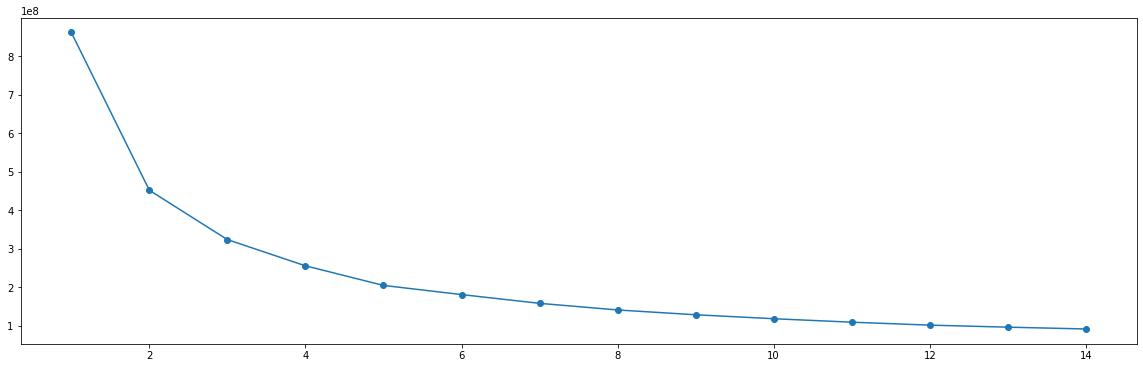

In [118]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [119]:
kmeans = KMeans(n_clusters=2, n_init = 15, random_state=22)

In [120]:
kmeans.fit(X_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=22, tol=0.0001, verbose=0)

In [121]:
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [122]:
df_final_labels = dfc.join(df_labels)

In [123]:
df_final_labels.head()

,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),City,County,State,Wind_Direction,...,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,labels
0,36.0,59.0,30.200001,10.00,3.0,0.0,2.000000,2.498771,2.413256,2.317347,...,0,0,0,0,0,0,0,0,0,1
1,36.0,55.0,30.040001,10.00,0.0,0.0,2.777409,2.432978,2.413256,2.259706,...,0,0,0,0,0,0,0,0,0,1
2,31.0,72.0,30.160000,10.00,0.0,0.0,2.144928,2.664069,2.413256,2.259706,...,0,0,0,0,0,0,0,0,1,1
3,26.0,81.0,30.040001,10.00,0.0,0.0,2.488372,2.431307,2.413256,2.259706,...,0,0,0,0,0,0,0,0,1,1
4,32.0,100.0,29.370001,0.25,5.0,0.0,2.527554,2.531400,2.474229,2.301463,...,0,0,0,0,0,0,0,0,1,1


In [124]:
df_final_labels['labels'].value_counts()

1    549070
0    397383
Name: labels, dtype: int64

In [125]:
pd.DataFrame(df_final_labels).to_csv("df_final_labels.csv",index=False)

In [126]:
dfc.head()

,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),City,County,State,Wind_Direction,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,36.0,59.0,30.200001,10.00,3.0,0.0,2.000000,2.498771,2.413256,2.317347,...,0,0,0,0,0,0,0,0,0,0
1,36.0,55.0,30.040001,10.00,0.0,0.0,2.777409,2.432978,2.413256,2.259706,...,0,0,0,0,0,0,0,0,0,0
2,31.0,72.0,30.160000,10.00,0.0,0.0,2.144928,2.664069,2.413256,2.259706,...,0,0,0,0,0,0,0,0,0,1
3,26.0,81.0,30.040001,10.00,0.0,0.0,2.488372,2.431307,2.413256,2.259706,...,1,0,0,0,0,0,0,0,0,1
4,32.0,100.0,29.370001,0.25,5.0,0.0,2.527554,2.531400,2.474229,2.301463,...,0,0,0,0,0,0,0,0,0,1


In [127]:
df6=pd.read_csv('df_final_labels.csv')

In [128]:
df6.memory_usage(index=True).sum()

204899840

In [129]:
for i in df6.columns:
    if df6[i].dtypes=='float64':
        df6[i]=df6[i].astype('float32')
    elif df6[i].dtypes=='int64':
        df6[i]=df6[i].astype('int32')

In [130]:
df6.dtypes

Temperature(F)       float32
Humidity(%)          float32
Pressure(in)         float32
Visibility(mi)       float32
Wind_Speed(mph)      float32
Precipitation(in)    float32
City                 float32
County               float32
State                float32
Wind_Direction       float32
Weather_Condition    float32
Month                float32
Amenity                int32
Bump                   int32
Crossing               int32
Give_Way               int32
Junction               int32
No_Exit                int32
Railway                int32
Roundabout             int32
Station                int32
Stop                   int32
Traffic_Calming        int32
Traffic_Signal         int32
Turning_Loop           int32
Sunrise_Sunset         int32
labels               float32
dtype: object

In [131]:
df6.memory_usage(index=True).sum()

102449960

In [132]:
df1=df6.copy()

In [133]:
df6=df6.dropna()
df6.shape

(946453, 27)

In [134]:
df6.head()

,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),City,County,State,Wind_Direction,...,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,labels
0,36.0,59.0,30.200001,10.00,3.0,0.0,2.000000,2.498771,2.413256,2.317347,...,0,0,0,0,0,0,0,0,0,1.0
1,36.0,55.0,30.040001,10.00,0.0,0.0,2.777409,2.432978,2.413256,2.259706,...,0,0,0,0,0,0,0,0,0,1.0
2,31.0,72.0,30.160000,10.00,0.0,0.0,2.144928,2.664069,2.413256,2.259706,...,0,0,0,0,0,0,0,0,1,1.0
3,26.0,81.0,30.040001,10.00,0.0,0.0,2.488372,2.431307,2.413256,2.259706,...,0,0,0,0,0,0,0,0,1,1.0
4,32.0,100.0,29.370001,0.25,5.0,0.0,2.527554,2.531400,2.474229,2.301463,...,0,0,0,0,0,0,0,0,1,1.0


In [135]:
X=df6.drop(columns=['labels'])
y=df6['labels']



In [136]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from vecstack import stacking

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
import numpy as np
import warnings

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 4)
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

C:\Users\Arun\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


X_train (634123, 26)
X_test (312330, 26)
y_train (634123,)
y_test (312330,)


In [137]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
decision_tree_classification = DecisionTreeClassifier(criterion='gini')

# train model
decision_tree = decision_tree_classification.fit(X_train, y_train)

In [138]:
decision_tree_pred = decision_tree.predict(X_test)

In [139]:
# accuracy measures by classification_report()
result = classification_report(y_test, decision_tree_pred)

# print the result
print(result)

              precision    recall  f1-score   support

         0.0       0.64      0.66      0.65    131246
         1.0       0.75      0.73      0.74    181084

    accuracy                           0.70    312330
   macro avg       0.69      0.69      0.69    312330
weighted avg       0.70      0.70      0.70    312330



In [140]:
decision_tree_predtrain = decision_tree.predict(X_train)

In [141]:
result = classification_report(y_train, decision_tree_predtrain)

# print the result
print(result)

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98    266137
         1.0       1.00      0.98      0.99    367986

    accuracy                           0.98    634123
   macro avg       0.98      0.99      0.98    634123
weighted avg       0.98      0.98      0.98    634123



In [142]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier()

In [143]:
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

#predict the model
y_pred=clf.predict(X_test)

In [144]:
print(classification_report(y_test, y_pred) )

              precision    recall  f1-score   support

         0.0       0.71      0.65      0.68    131246
         1.0       0.76      0.80      0.78    181084

    accuracy                           0.74    312330
   macro avg       0.73      0.73      0.73    312330
weighted avg       0.74      0.74      0.74    312330



In [145]:
y_predt=clf.predict(X_train)

In [146]:
print(classification_report(y_train, y_predt) )

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98    266137
         1.0       0.99      0.99      0.99    367986

    accuracy                           0.98    634123
   macro avg       0.98      0.98      0.98    634123
weighted avg       0.98      0.98      0.98    634123



In [148]:
#we can see that both decision tree and random forest are overfitting, so we are going to do stacking

In [149]:
warnings.simplefilter('ignore')

models = [
    KNeighborsClassifier(n_neighbors=5,
                        n_jobs=-1),

    RandomForestClassifier(random_state=0, n_jobs=-1,
                           n_estimators=100, max_depth=3),

    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1,
                  n_estimators=100, max_depth=3)
]

In [150]:
S_train, S_test = stacking(models,
                           X_train, y_train, X_test,
                           regression=False,

                           mode='oof_pred_bag',

                           needs_proba=False,

                           save_dir=None,

                           metric=accuracy_score,

                           n_folds=4,

                           stratified=True,

                           shuffle=True,

                           random_state=0,

                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.60279693]
    fold  1:  [0.60399543]
    fold  2:  [0.60249415]
    fold  3:  [0.60178515]
    ----
    MEAN:     [0.60276792] + [0.00079819]
    FULL:     [0.60276792]

model  1:     [RandomForestClassifier]
    fold  0:  [0.60933193]
    fold  1:  [0.61179202]
    fold  2:  [0.61194971]
    fold  3:  [0.60992241]
    ----
    MEAN:     [0.61074902] + [0.00114247]
    FULL:     [0.61074902]

model  2:     [XGBClassifier]
    fold  0:  [0.63689121]
    fold  1:  [0.63609010]
    fold  2:  [0.63746523]
    fold  3:  [0.63476944]
    ----
    MEAN:     [0.63630400] + [0.00101167]
    FULL:     [0.63630400]



In [151]:
model = XGBClassifier(random_state=0, n_jobs=-1,
                           n_estimators=100, max_depth=3)
    
model = model.fit(S_train, y_train)


In [152]:
y_pred = model.predict(S_test)
print('test prediction score: [%.8f]' % accuracy_score(y_test, y_pred))

test prediction score: [0.63703455]


In [153]:
y_predt = model.predict(S_train)
print('train prediction score: [%.8f]' % accuracy_score(y_train, y_predt))

train prediction score: [0.63630400]


In [154]:
result = classification_report(y_train, y_predt)
print(result)

              precision    recall  f1-score   support

         0.0       0.57      0.52      0.54    266137
         1.0       0.67      0.72      0.70    367986

    accuracy                           0.64    634123
   macro avg       0.62      0.62      0.62    634123
weighted avg       0.63      0.64      0.63    634123



In [155]:
result = classification_report(y_test, y_pred)


In [156]:
print(result)

              precision    recall  f1-score   support

         0.0       0.57      0.53      0.55    131246
         1.0       0.68      0.72      0.70    181084

    accuracy                           0.64    312330
   macro avg       0.63      0.62      0.62    312330
weighted avg       0.63      0.64      0.63    312330



In [ ]:
# we are able to get 64 percent accuracy with stacking.
# from the tw0 clusters fromed we can do many more eda to understand the reasons that cause accidents